In [1]:
import numpy as np
import matplotlib.pyplot as plt
random_seed=42

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

## Softmax Regression: multi-class multinomial logistic regressions

In [3]:
X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)

In [7]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Softmax regression predicts a value for each class, and predicts based on the class with max probability. That is why it is called soft-max. 

In [8]:
softmax_reg.predict([[5, 2]]) # petal: length=5 cm, width = 2cm

array([2])

In [9]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Working under the hood

I will make a space for all the data points in the given sample and some more, and estimate the model's predictions over the space. 

In [10]:
X[:,0].min(), X[:,0].max()  # petal length

(1.0, 6.9)

In [11]:
X[:,1].min(), X[:,1].max()  # petal width

(0.1, 2.5)

I will create a sample space with x ~ (0,7) and y ~ (0,3.5): 3.5 rather than 2.5 to keep space for contour lines

In [12]:
x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

Find the probabilities for each state and the model's predictions for each point in X_new.

In [13]:
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

In [14]:
zz0 = y_proba[:, 0].reshape(x0.shape) 
zz1 = y_proba[:, 1].reshape(x0.shape) 
zz2 = y_proba[:, 2].reshape(x0.shape) 
zz = y_predict.reshape(x0.shape)

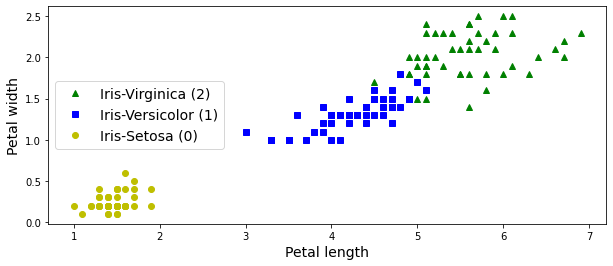

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica (2)")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa (0)")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)


To see how the decision borders look, I will overlay a plot of zz, predicted values, as a colormap

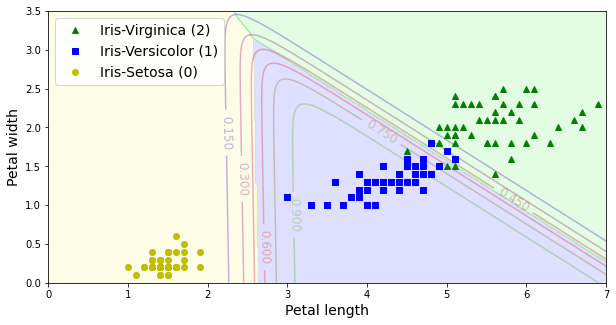

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica (2)")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa (0)")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap,alpha=.3) # predictions heat maps

#contour2 = plt.contour(x0, x1, zz2, cmap=plt.cm.brg,alpha=.3)
contour1 = plt.contour(x0, x1, zz1, cmap=plt.cm.brg,alpha=.3)
#contour0 = plt.contour(x0, x1, zz0, cmap=plt.cm.brg,alpha=.3)

#plt.clabel(contour2, inline=1, fontsize=12)
plt.clabel(contour1, inline=1, fontsize=12)
#plt.clabel(contour0, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)


Prediction for 1 is best to demonstrate the contour lines.

If a value falls in the yellow region it will be predicted as 0, Setosa, blue as 1 and green as 2, respectively.

Observations:
1. The contours are curved lines, because these are smoothed fitted curves. 
2. All decision boundaries are straight lines for p>=1/3. 
2. Where the three color maps meet, the p is 1/3 for each class. 